In [3]:
#Importing the Dependencies 
import numpy as np
import pandas as pd 
import matplotlib as mpl
import matplotlib.pyplot as plt
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
plt.style.use('seaborn')
mpl.rc('axes', titlesize=14, titleweight='semibold')

In [4]:
#Getting the Data
tesla = pd.read_csv('/content/Tesla.csv - Tesla.csv.csv')

In [5]:
tesla.head()

,Date,Open,High,Low,Close,Volume,Adj Close
0,6/29/2010,19.000000,25.00,17.540001,23.889999,18766300,23.889999
1,6/30/2010,25.790001,30.42,23.299999,23.830000,17187100,23.830000
2,7/1/2010,25.000000,25.92,20.270000,21.959999,8218800,21.959999
3,7/2/2010,23.000000,23.10,18.709999,19.200001,5139800,19.200001
4,7/6/2010,20.000000,20.00,15.830000,16.110001,6866900,16.110001


In [6]:
#Adding Returns and Cumulative returns to the tesla dataframe
tesla['returns'] = tesla['Close'].pct_change(1)
tesla['CumulativeReturn'] = (1+tesla['returns']).cumprod()
tesla.head()

,Date,Open,High,Low,Close,Volume,Adj Close,returns,CumulativeReturn
0,6/29/2010,19.000000,25.00,17.540001,23.889999,18766300,23.889999,NaN,NaN
1,6/30/2010,25.790001,30.42,23.299999,23.830000,17187100,23.830000,-0.002511,0.997489
2,7/1/2010,25.000000,25.92,20.270000,21.959999,8218800,21.959999,-0.078473,0.919213
3,7/2/2010,23.000000,23.10,18.709999,19.200001,5139800,19.200001,-0.125683,0.803684
4,7/6/2010,20.000000,20.00,15.830000,16.110001,6866900,16.110001,-0.160937,0.674341


In [7]:
#Moving Average Indicators
tesla['MA20'] = tesla['Close'].rolling(20).mean()
tesla['STD20'] = tesla['Close'].rolling(20).std()
tesla['MA150'] = tesla['Close'].rolling(150).mean()
tesla.head()

,Date,Open,High,Low,Close,Volume,Adj Close,returns,CumulativeReturn,MA20,STD20,MA150
0,6/29/2010,19.000000,25.00,17.540001,23.889999,18766300,23.889999,NaN,NaN,NaN,NaN,NaN
1,6/30/2010,25.790001,30.42,23.299999,23.830000,17187100,23.830000,-0.002511,0.997489,NaN,NaN,NaN
2,7/1/2010,25.000000,25.92,20.270000,21.959999,8218800,21.959999,-0.078473,0.919213,NaN,NaN,NaN
3,7/2/2010,23.000000,23.10,18.709999,19.200001,5139800,19.200001,-0.125683,0.803684,NaN,NaN,NaN
4,7/6/2010,20.000000,20.00,15.830000,16.110001,6866900,16.110001,-0.160937,0.674341,NaN,NaN,NaN


In [15]:
#Getting rid of Na values and setting the Date from 2010 onwards
tesla.dropna(inplace=True)
tesla = tesla.loc[tesla['Date'] >= '01/01/2010']
tesla.head()

,Date,Open,High,Low,Close,Volume,Adj Close,returns,CumulativeReturn,MA20,STD20,MA150,lower_band,upper_band
169,3/1/2011,24.049999,24.320000,23.700001,23.940001,1106400,23.940001,0.002093,1.002093,23.3640,0.739206,24.114333,21.885589,24.842411
170,3/2/2011,23.820000,24.280001,23.730000,24.020000,663300,24.020000,0.003342,1.005442,23.3695,0.743876,24.136333,21.881747,24.857253
171,3/3/2011,24.480000,24.790001,24.059999,24.360001,640200,24.360001,0.014155,1.019674,23.3905,0.766417,24.163067,21.857667,24.923333
172,3/4/2011,24.480000,24.990000,23.780001,24.950001,1580100,24.950001,0.024220,1.044370,23.4565,0.841304,24.196467,21.773892,25.139108
173,3/7/2011,24.930000,25.400000,24.700001,24.940001,2033600,24.940001,-0.000401,1.043952,23.5305,0.904355,24.223267,21.721790,25.339210


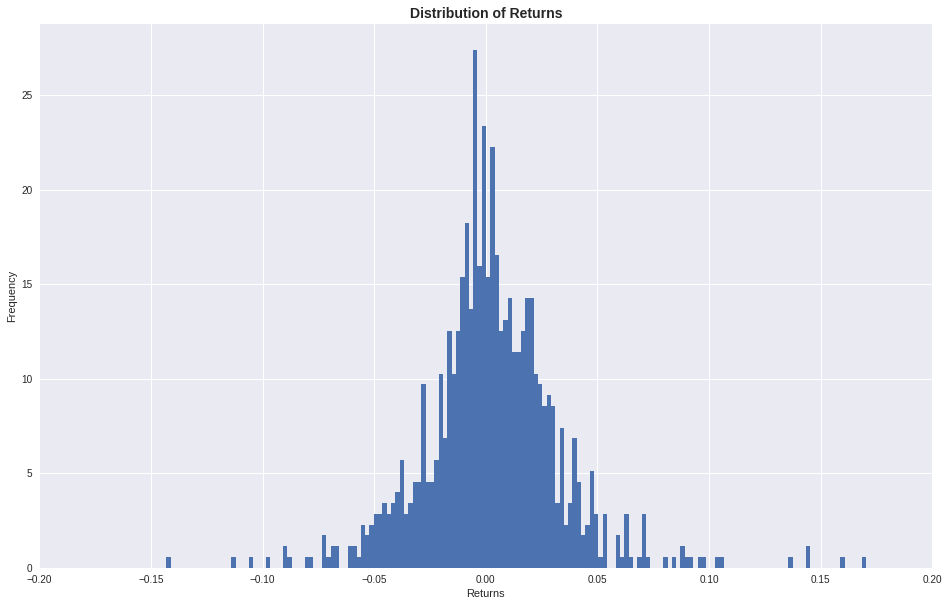

In [11]:
#plotting the distrbution of returns of tesla stock over the years
plt.figure(figsize=(16,10))
plt.hist(tesla['returns'], density=True, bins=200)
plt.title("Distribution of Returns")
plt.xlabel("Returns")
plt.ylabel("Frequency")
plt.xlim(-0.20, 0.20)
plt.show();

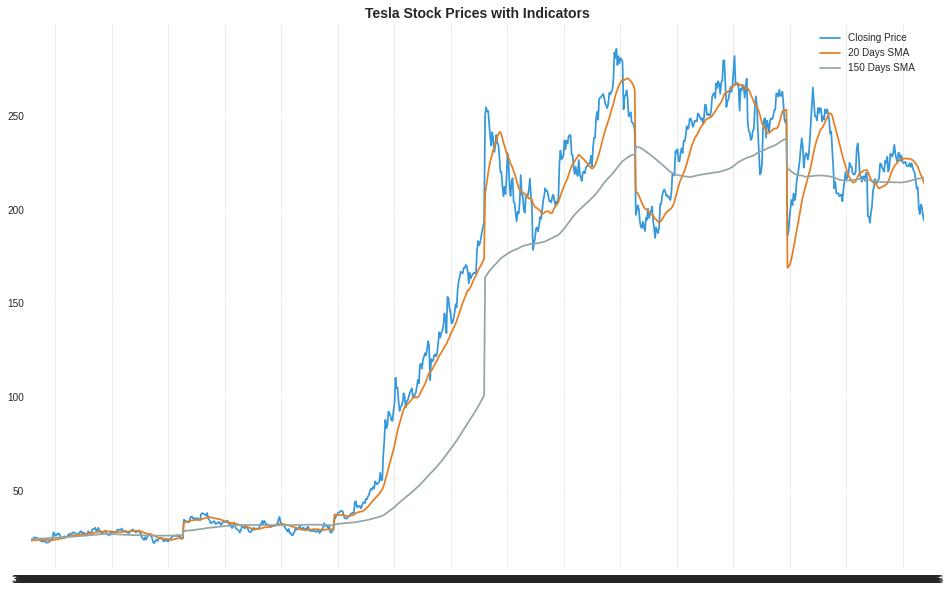

In [12]:
trading_days = tesla['Date']
fig, ax = plt.subplots(figsize=(16,10))
ax.plot(trading_days, tesla['Close'],label="Closing Price", color="#3498db")
ax.plot(trading_days, tesla['MA20'], label="20 Days SMA", color="#e67e22")
ax.plot(trading_days, tesla['MA150'], label="150 Days SMA", color="#95a5a6")
ax.set_title("Tesla Stock Prices with Indicators", fontsize="14", fontweight="semibold")
ax.set_xlim([trading_days.min(), trading_days.max()])
plt.legend();

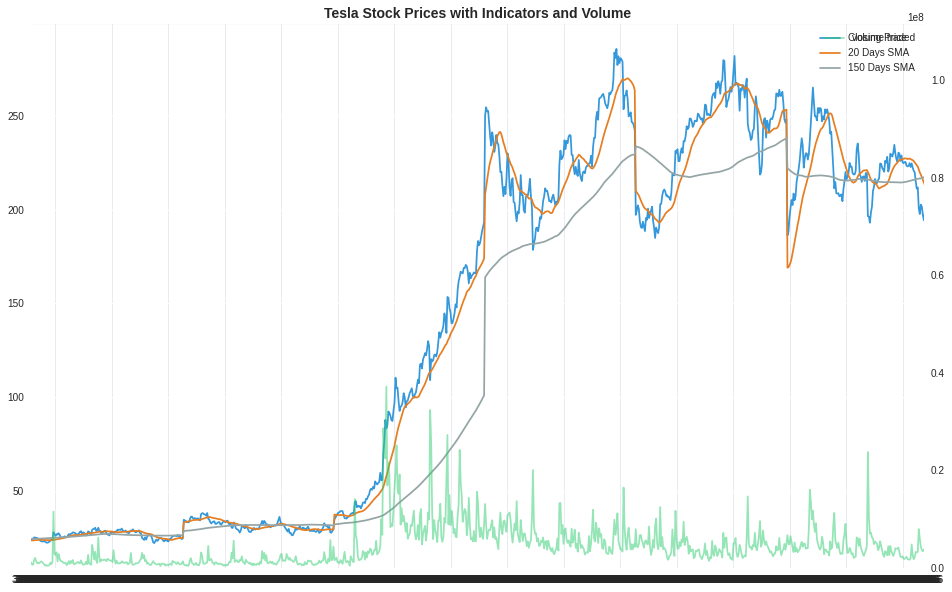

In [13]:
fig, priceplot = plt.subplots(figsize=(16, 10))
priceplot.plot(trading_days, tesla[["Close"]], color="#3498db", label="Closing Price")
priceplot.plot(trading_days, tesla[["MA20"]], color="#e67e22", label="20 Days SMA")
priceplot.plot(trading_days, tesla[["MA150"]], color="#95a5a6", label="150 Days SMA")
priceplot.set_xlim([trading_days.min(), trading_days.max()])
priceplot.set_title("Tesla Stock Prices with Indicators and Volume", fontsize="14", fontweight="semibold")
plt.legend()

volplot = priceplot.twinx()
volplot.set_ylim([0,tesla['Volume'].max()*3])
volplot.plot(trading_days, tesla[["Volume"]], color="#2ecc71", label="volume traded", alpha=0.5)
volplot.grid(False)
plt.legend();

In [14]:
#Bollinger Bands
tesla['lower_band'] = tesla['MA20'] - 2*tesla['STD20']
tesla['upper_band'] = tesla['MA20'] + 2*tesla['STD20']
tesla.head()

,Date,Open,High,Low,Close,Volume,Adj Close,returns,CumulativeReturn,MA20,STD20,MA150,lower_band,upper_band
169,3/1/2011,24.049999,24.320000,23.700001,23.940001,1106400,23.940001,0.002093,1.002093,23.3640,0.739206,24.114333,21.885589,24.842411
170,3/2/2011,23.820000,24.280001,23.730000,24.020000,663300,24.020000,0.003342,1.005442,23.3695,0.743876,24.136333,21.881747,24.857253
171,3/3/2011,24.480000,24.790001,24.059999,24.360001,640200,24.360001,0.014155,1.019674,23.3905,0.766417,24.163067,21.857667,24.923333
172,3/4/2011,24.480000,24.990000,23.780001,24.950001,1580100,24.950001,0.024220,1.044370,23.4565,0.841304,24.196467,21.773892,25.139108
173,3/7/2011,24.930000,25.400000,24.700001,24.940001,2033600,24.940001,-0.000401,1.043952,23.5305,0.904355,24.223267,21.721790,25.339210


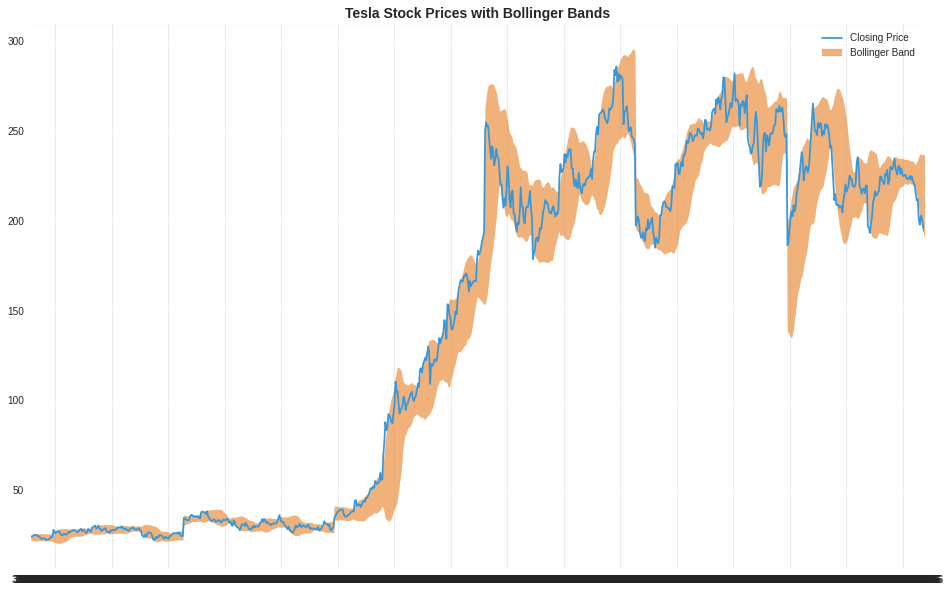

In [16]:
fig, ax = plt.subplots(figsize=(16,10))
ax.plot(trading_days, tesla['Close'],label="Closing Price", color="#3498db")
ax.fill_between(trading_days, tesla['upper_band'], tesla['lower_band'], color='#e67e22', alpha=0.6, label="Bollinger Band")
ax.set_title('Tesla Stock Prices with Bollinger Bands')
ax.set_xlim(trading_days.min(), trading_days.max())
plt.legend();